MACS30100: Problem Set 4

Dr. Evans

Name : Dan Gamarnik


In [33]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams
import math
from sklearn import neighbors

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# 1). Linear Regression

In [34]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

url = ('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
auto = pd.read_csv(url)
auto.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
                   'year','origin','name']
mask1 = auto['horsepower'] != '?'
auto = auto[mask1]
auto['horsepower'] = auto['horsepower'].apply(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [35]:
auto_data = auto.drop(['name'], 1)

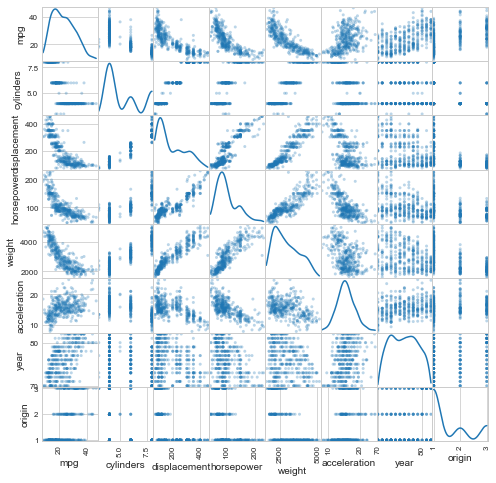

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(auto_data, alpha=0.3, figsize=(8, 8), diagonal='kde')
plt.show()

In [37]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [38]:
Y = auto['mpg']
X = np.column_stack((auto['cylinders'], auto['displacement'], auto['weight'], auto['horsepower'],
                     auto['acceleration'], auto['year'], auto['origin'] )) 
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
res1 = model1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        23:56:07   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2184      4.644     -3.707      0.0

(D).

i. The coefficients are statistically siginificant at the 1% level for x2, x3, x6, x7, with the variables being  displacement, vehicle weight, vehicle year and vehicle origin.

ii. The coefficients are not siginifcant at the 10% level for x4, x5, that is horsepower and acceleration.

iii. The model specified means that if, conditional on all other things being equal, for every 1 year of the vehicle, then we could have 0.75 more miles per gallon. That's seems wrong to me, since it is likely results by multicolinearity.

(E). Engine displacement, horsepower and acceleration is likely to have non-linear relationship.


In [39]:
auto['displacement_squared'] = auto['displacement']*auto['displacement']
auto['horsepower_squared'] = auto['horsepower']*auto['horsepower']
auto['weight_squared'] = auto['weight']*auto['weight']
auto['acceleration_squared'] = auto['acceleration']*auto['acceleration']

auto['constant'] = 1
regression = sm.OLS(endog=auto['mpg'], exog=auto[['constant', 'cylinders', 'displacement', \
                                              'displacement_squared', 'horsepower',\
                                              'horsepower_squared', 'weight', 'weight_squared',\
                                              'acceleration_squared','acceleration',\
                                             'year', 'origin']], missing='drop')
results2 = regression.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        23:56:07   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                20.1084 

ii. R square is 0.866, improved for 4% compared to the previous 0.818.
iii. It change from significant at 0.008 confidence to 0.04 confidence, and no longer significant. 

iv. It became more insignificant, from a p-value of 0.13 to 0.44. 

In [40]:
# 1 F).

prediction = results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15**2, 15, 99, 1])

print("The predicted miles per gallon mpg of a car with \
6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, \
acceleration of 15.1, model year of 1999, and origin of 1 is:\n", prediction, "miles per gallon.")

The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1 is:
 [ 38.76772272] miles per gallon.


# 2). KNN  

In [41]:
# Make a dataframe
table = {'x1' : [0, 2, 0 , 0, -1, 1],
        'x2' : [3, 0, 1, 1, 0, 1], 
        'x3' : [0, 0, 3, 2, 1, 1], 
        'y' : ['r', 'r', 'r', 'g', 'g', 'r']}

table

knn = pd.DataFrame(data = table)

# adding column
knn['e_dist'] = np.sqrt(knn['x1']**2 + knn['x2']**2 + knn['x3']**2) # how is this equation formed?
knn.loc[:,'y':'e_dist']

,y,e_dist
0,r,3.000000
1,r,2.000000
2,r,3.162278
3,g,2.236068
4,g,1.414214
5,r,1.732051


In [42]:
#2 B).

print("2B)"
    
    "At k = 1, whatever point is closest to 0,0,0 would be the color -- in this case the point to be green.")

#2 C).

print("2C)" 
    "At k = 3, whatever point is closest to 0,0,0 would be the color -- in this case the point to be red." )

print("2D)"
    
    "It is more optimal to have a decision boundary with lower k. This is because of its flexibility which will have a lower bias but higher variance.")

2B)At k = 1, whatever point is closest to 0,0,0 would be the color -- in this case the point to be green.
2C)At k = 3, whatever point is closest to 0,0,0 would be the color -- in this case the point to be red.
2D)It is more optimal to have a decision boundary with lower k. This is because of its flexibility which will have a lower bias but higher variance.


In [43]:
# 2 E).

y = knn['y'] #result column 
x = np.column_stack((knn['x1'], knn['x2'], knn['x3']))
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)# k = 2 
results3 = knn_classifier.fit(x, y)
print(results3.predict([(1, 1, 1)]))

print("The expected result would be green")

['g']
The expected result would be green


In [44]:
median = auto['mpg'].median()
auto['mpg_high_truth'] = auto['mpg']  >= median
auto['mpg_high'] = auto['mpg_high_truth'].apply(lambda x: int(x))
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,constant,mpg_high_truth,mpg_high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,94249.0,16900,12278016,144.00,1,False,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,122500.0,27225,13638249,132.25,1,False,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,101124.0,22500,11806096,121.00,1,False,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,92416.0,22500,11785489,144.00,1,False,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,91204.0,19600,11895601,110.25,1,False,0


In [45]:
Y3 = auto['mpg_high']
X3 = np.column_stack((auto['cylinders'], auto['displacement'], auto['weight'], auto['horsepower'],
                     auto['acceleration'], auto['year'], auto['origin'])) 
X3 = sm.add_constant(X3)
LogitModel = sm.Logit(Y3, X3)
LogitReg = LogitModel.fit()
LogitReg.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        23:56:08   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.862      -0.021       0.026
x3            -0.0043      0.001     -3.784      0.000      -0.007      -0.002
x4            -0.0410      0.024     -1.718      0.086      -0.088       0.006
x5             0.0161      0.141      0.114      0.910      -0.261       0.293
x6             0.4295      0.075      5.709      0.000       0.282       0.577
x7             0.4773      0.362      1.319      0.187      -0.232       1.187
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

3 A). 
x3 and x6 are significant at the 5% level, which are weights and year. It is negative for x3 and positive for x6, which means the longer the car is the higher probability that they to have mpg_high, and the higher the weight, the less likely they are to have mpg_high.

In [46]:
# 3 B). 

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size = .5,
                                                    random_state=10)

# 3 C). 

LogReg = LogisticRegression()
LogRes = LogReg.fit(X_train, y_train)
print('The intercept is',LogRes.intercept_)
print('The coefficients are', LogRes.coef_)

The intercept is [-0.03043732]
The coefficients are [[ -3.04373172e-02  -3.15786653e-01   2.37433412e-04  -4.92219570e-03
   -5.25624878e-02  -1.79506398e-01   3.09166947e-01  -9.01801042e-02]]


In [47]:
# 3 D). 

y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



3 D). 
The two are very similar but the model seems to predict (mpg high=0) slightly better.
